In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [73]:
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("./Large Cars Dataset.csv")
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


<h1 style="color: #4563AF; font-family: roboto">Data Preparation</h1>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         428 non-null    object 
 1   Model         428 non-null    object 
 2   VehicleClass  428 non-null    object 
 3   Region        428 non-null    object 
 4   DriveTrain    428 non-null    object 
 5   MSRP          428 non-null    object 
 6   DealerCost    428 non-null    object 
 7   EngineSize    428 non-null    float64
 8   Cylinders     426 non-null    float64
 9   HorsePower    428 non-null    int64  
 10  MPG_City      428 non-null    int64  
 11  MPG_Highway   428 non-null    int64  
 12  Weight        428 non-null    int64  
 13  Wheelbase     428 non-null    int64  
 14  Length        428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [76]:
df['MSRP'] = df['MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['DealerCost'] = df['DealerCost'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197


In [77]:
df.describe()

,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [78]:
df.isnull().sum()

Brand           0
Model           0
VehicleClass    0
Region          0
DriveTrain      0
MSRP            0
DealerCost      0
EngineSize      0
Cylinders       2
HorsePower      0
MPG_City        0
MPG_Highway     0
Weight          0
Wheelbase       0
Length          0
dtype: int64

In [79]:
df.duplicated().sum()

np.int64(0)

<h1 style="color: #4563AF; font-family: roboto">EDA</h1>

In [80]:
brands = df.groupby('Brand').size().reset_index(name="count").sort_values('count', ascending=False)
print(brands)

            Brand  count
35         Toyota     28
5       Chevrolet     27
23  Mercedes-Benz     26
8            Ford     23
2             BMW     20
1            Audi     19
26         Nissan     17
10          Honda     17
6        Chrysler     15
36     Volkswagen     15
25     Mitsubishi     13
7           Dodge     13
37          Volvo     12
12        Hyundai     12
15         Jaguar     12
33         Subaru     11
17            Kia     11
28        Pontiac     11
22          Mazda     11
19          Lexus     11
3           Buick      9
24        Mercury      9
20        Lincoln      9
4        Cadillac      8
9             GMC      8
31         Saturn      8
34         Suzuki      8
13       Infiniti      8
0           Acura      7
30           Saab      7
29        Porsche      7
18     Land Rover      3
27     Oldsmobile      3
16           Jeep      3
14          Isuzu      2
21           MINI      2
32          Scion      2
11         Hummer      1


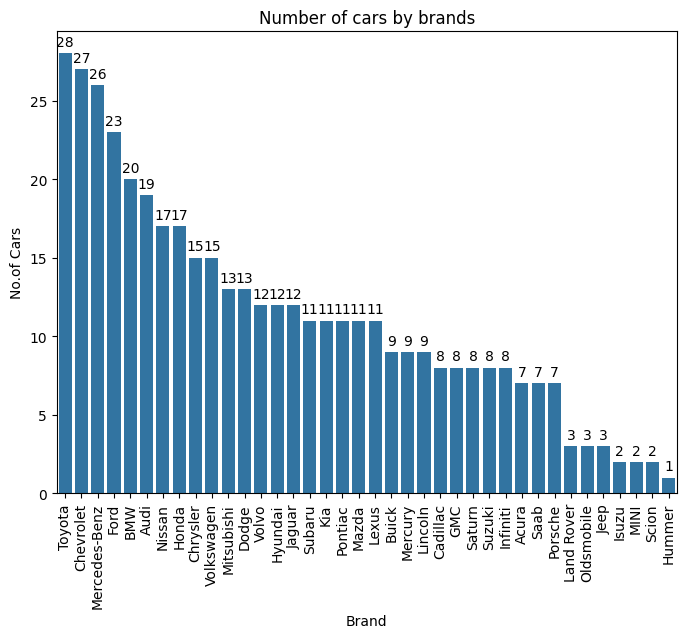

In [81]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=brands,
    x= 'Brand',
    y= 'count'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.f', label_type='edge', padding=3)

plt.title("Number of cars by brands")
plt.xticks(rotation = 90)
plt.ylabel("No.of Cars")
plt.show()

Toyota has most cars in the market

In [82]:
#avg MSRP by brand
msrp_brand= df.groupby('Brand').agg({'MSRP': 'mean'}).reset_index().sort_values('MSRP', ascending=False)
print(msrp_brand)

            Brand          MSRP
29        Porsche  83565.000000
15         Jaguar  61580.416667
23  Mercedes-Benz  60656.807692
4        Cadillac  50474.375000
11         Hummer  49995.000000
18     Land Rover  45831.666667
19          Lexus  44215.454545
1            Audi  43307.894737
2             BMW  43285.250000
0           Acura  42938.571429
20        Lincoln  42875.555556
30           Saab  37640.000000
37          Volvo  36314.166667
13       Infiniti  36070.000000
36     Volkswagen  32248.666667
3           Buick  30537.777778
9             GMC  29560.500000
24        Mercury  27972.777778
6        Chrysler  27252.000000
5       Chevrolet  26587.037037
7           Dodge  26253.846154
14          Isuzu  26149.000000
33         Subaru  25501.818182
26         Nissan  24730.941176
16           Jeep  24518.333333
28        Pontiac  24156.363636
8            Ford  24015.869565
27     Oldsmobile  23763.333333
25     Mitsubishi  23423.615385
35         Toyota  22524.464286
22      

In [83]:
#avg DealerCost by brand
dealer_brand= df.groupby('Brand').agg({'DealerCost': 'mean'}).reset_index().sort_values('DealerCost', ascending=False)
print(dealer_brand)

            Brand    DealerCost
29        Porsche  73662.857143
23  Mercedes-Benz  56453.307692
15         Jaguar  56098.416667
4        Cadillac  46426.875000
11         Hummer  45815.000000
18     Land Rover  41851.000000
2             BMW  39620.650000
1            Audi  39330.105263
20        Lincoln  39135.777778
19          Lexus  38760.000000
0           Acura  38590.857143
30           Saab  35620.285714
37          Volvo  34216.166667
13       Infiniti  32880.000000
36     Volkswagen  29682.666667
3           Buick  27854.888889
9             GMC  26289.375000
24        Mercury  25657.555556
6        Chrysler  25270.066667
14          Isuzu  24619.000000
7           Dodge  24160.076923
5       Chevrolet  24060.814815
33         Subaru  23297.545455
26         Nissan  22997.470588
16           Jeep  22644.666667
28        Pontiac  22159.636364
8            Ford  21953.000000
25     Mitsubishi  21834.769231
27     Oldsmobile  21749.000000
35         Toyota  20295.928571
22      

In [84]:
#currency function
def value_to_currency(value):
    return f"${value:,.00f}"

In [87]:
unique_brands= df['Brand'].unique()
colors= sns.color_palette("Set3", len(unique_brands))
color_map= dict(zip(unique_brands, colors))

#color for both charts
msrp_colors= msrp_brand['Brand'].map(color_map)
dealer_colors= dealer_brand['Brand'].map(color_map)

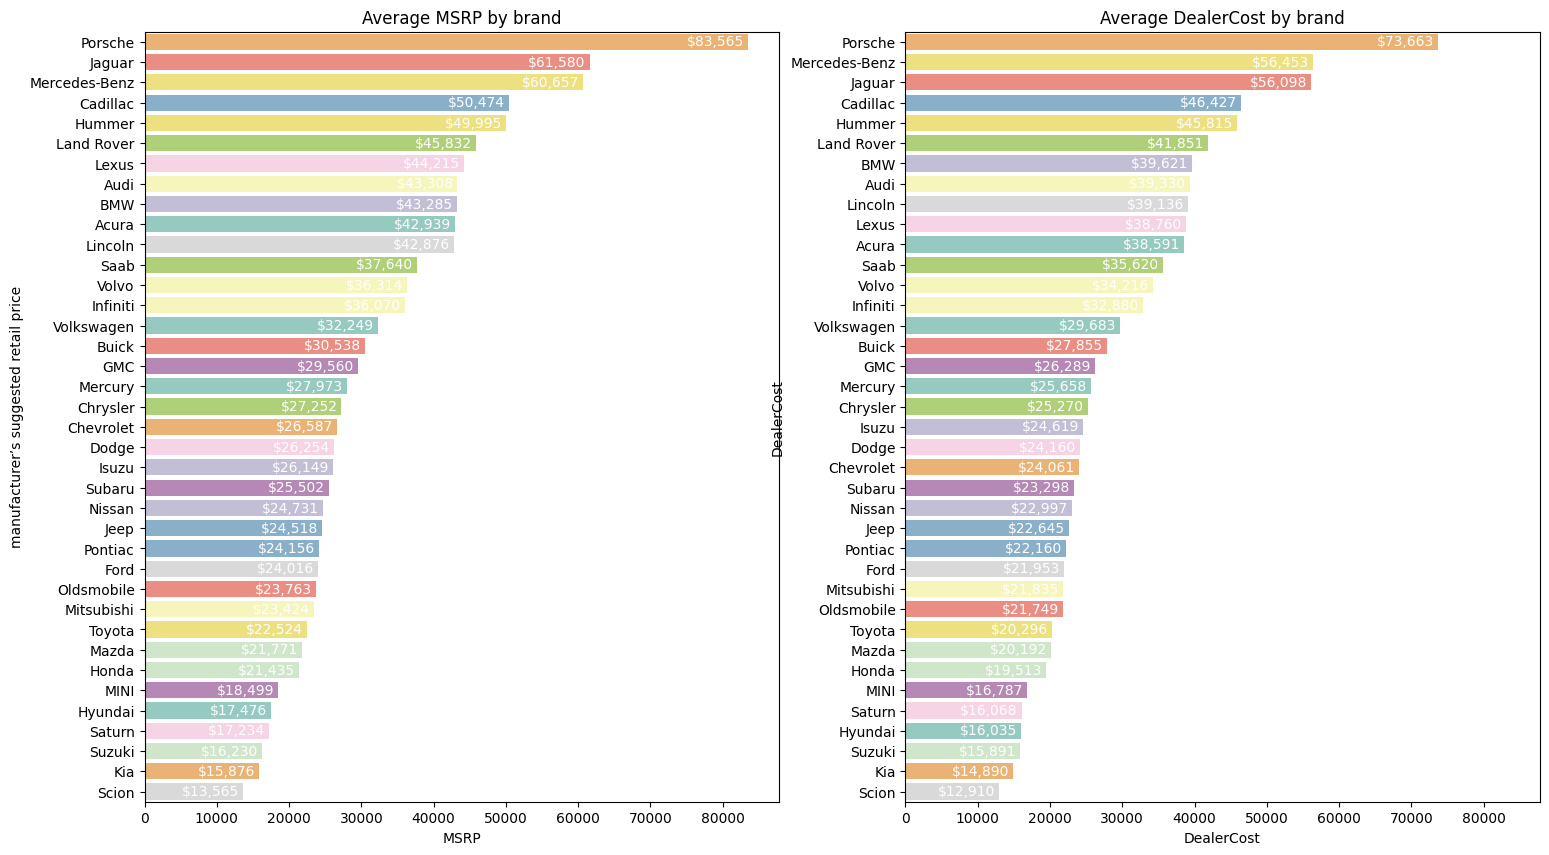

In [89]:
fig, axes = plt.subplots(1,2, figsize=(18,10), sharex=True)

sns.barplot(
    data=msrp_brand,
    x='MSRP',
    y='Brand',
    palette=color_map,
    ax=axes[0]
)

sns.barplot(
    data=dealer_brand,
    x='DealerCost',
    y='Brand',
    palette=color_map,
    ax=axes[1]
)

for line in msrp_brand.groupby('Brand'):
    category, group = line
    for index, row in group.iterrows():
        axes[0].text(row['MSRP'] - 4500 , row['Brand'], value_to_currency(row['MSRP']), ha='center', va='center', fontsize= 10, color='white')

for line in dealer_brand.groupby('Brand'):
    category, group = line
    for index, row in group.iterrows():
        axes[1].text(row['DealerCost'] - 4500, row['Brand'], value_to_currency(row['DealerCost']), ha='center', va='center', fontsize= 10,color='white')

axes[0].set_title("Average MSRP by brand")
axes[0].set_ylabel("manufacturer’s suggested retail price")

axes[1].set_title("Average DealerCost by brand")
axes[1].set_ylabel("DealerCost")

plt.show()

obs: porsche, jaguar, mercedes-benz are the top 3 brands with highest MSRP (Manufacturer's suggested retail price) and Dealer Cost,</br>
with porsche as the highest in both making it the most expensive brand.</br> 

MSRP is greater than the DealerCost

In [94]:
#average MSRP, Dealer Cost by region

region_msrp_dealer= df.groupby("Region").agg({'MSRP': 'mean', 'DealerCost': 'mean'}).reset_index().sort_values('MSRP', ascending=False)
region_msrp_dealer= region_msrp_dealer.melt(id_vars='Region', value_vars={'MSRP', 'DealerCost'}, var_name='Metric', value_name='Value')
print(region_msrp_dealer)

   Region      Metric         Value
0  Europe  DealerCost  44395.081301
1     USA  DealerCost  25949.340136
2    Asia  DealerCost  22602.177215
3  Europe        MSRP  48349.796748
4     USA        MSRP  28377.442177
5    Asia        MSRP  24741.322785


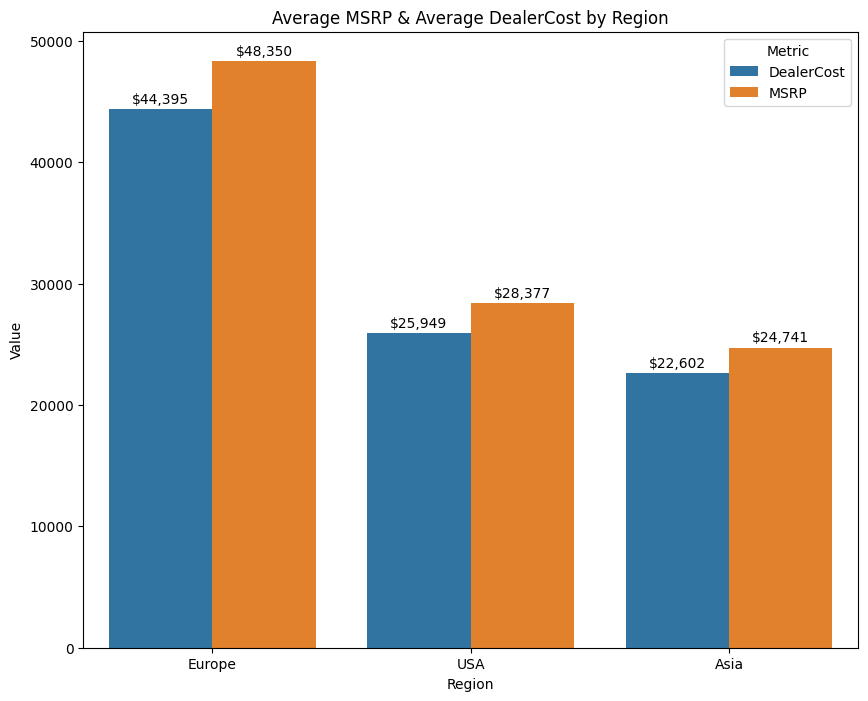

In [95]:
plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=region_msrp_dealer,
    x='Region',
    y='Value',
    hue='Metric'
)

for container in ax.containers:
    labels= [value_to_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 2)

plt.title("Average MSRP & Average DealerCost by Region")
plt.show()

- like the previous chart MSRP is relatively larger than the DealerCost </br>
- Cars in Europe cost in average more than nearly half average costs in USA OR Asia (May be that most luxuries cars are Europe based)

In [102]:
#brands by region
region_brand= df[df['MSRP'] > df['MSRP'].mean()].groupby(['Region', 'Brand']).size().reset_index(name="Count")
print(region_brand)

    Region          Brand  Count
0     Asia          Acura      5
1     Asia          Honda      1
2     Asia       Infiniti      4
3     Asia          Lexus      7
4     Asia     Mitsubishi      1
5     Asia         Nissan      3
6     Asia         Toyota      2
7   Europe           Audi     17
8   Europe            BMW     17
9   Europe         Jaguar     11
10  Europe     Land Rover      2
11  Europe  Mercedes-Benz     23
12  Europe        Porsche      7
13  Europe           Saab      6
14  Europe     Volkswagen      6
15  Europe          Volvo      9
16     USA          Buick      3
17     USA       Cadillac      7
18     USA      Chevrolet      7
19     USA       Chrysler      3
20     USA          Dodge      1
21     USA           Ford      4
22     USA            GMC      2
23     USA         Hummer      1
24     USA        Lincoln      8
25     USA        Mercury      2
26     USA        Pontiac      2


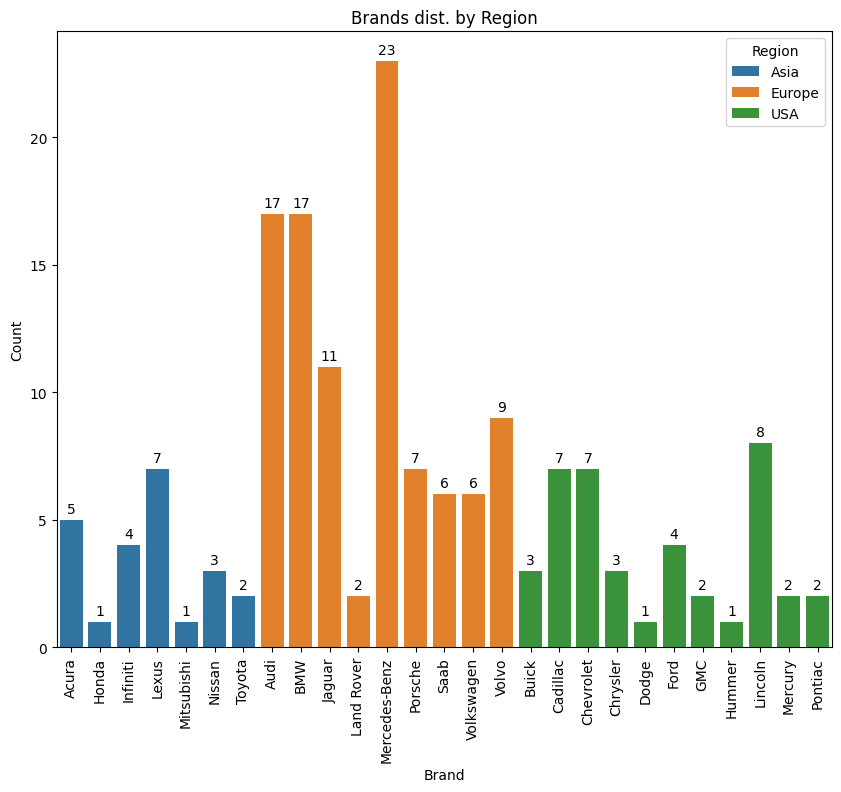

In [119]:
plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=region_brand,
    x= 'Brand',
    y= 'Count',
    hue= 'Region'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge', padding=3)

plt.title("Brands dist. by Region")
plt.xticks(rotation= 90)
plt.show()

luxuries (expensive) cars (price higher than average) are most located in Europe that's explain Why MSRP & DealerCost are high relative to the other two regions (Asia, USA)

In [120]:
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197


In [121]:
#average MSRP, Dealer Cost by vehicleclass

vehicle_class_msrp_dealer= df.groupby("VehicleClass").agg({'MSRP': 'mean', 'DealerCost': 'mean'}).reset_index().sort_values('MSRP', ascending=False)
vehicle_class_msrp_dealer= vehicle_class_msrp_dealer.melt(id_vars='VehicleClass', value_vars={'MSRP', 'DealerCost'}, var_name='Metric', value_name='Value')
print(vehicle_class_msrp_dealer)

   VehicleClass      Metric         Value
0        Sports  DealerCost  48473.163265
1           SUV  DealerCost  31625.350000
2         Sedan  DealerCost  27389.797710
3         Wagon  DealerCost  26645.633333
4         Truck  DealerCost  22616.750000
5        Hybrid  DealerCost  18429.333333
6        Sports        MSRP  53387.061224
7           SUV        MSRP  34790.250000
8         Sedan        MSRP  29773.618321
9         Wagon        MSRP  28840.533333
10        Truck        MSRP  24941.375000
11       Hybrid        MSRP  19920.000000


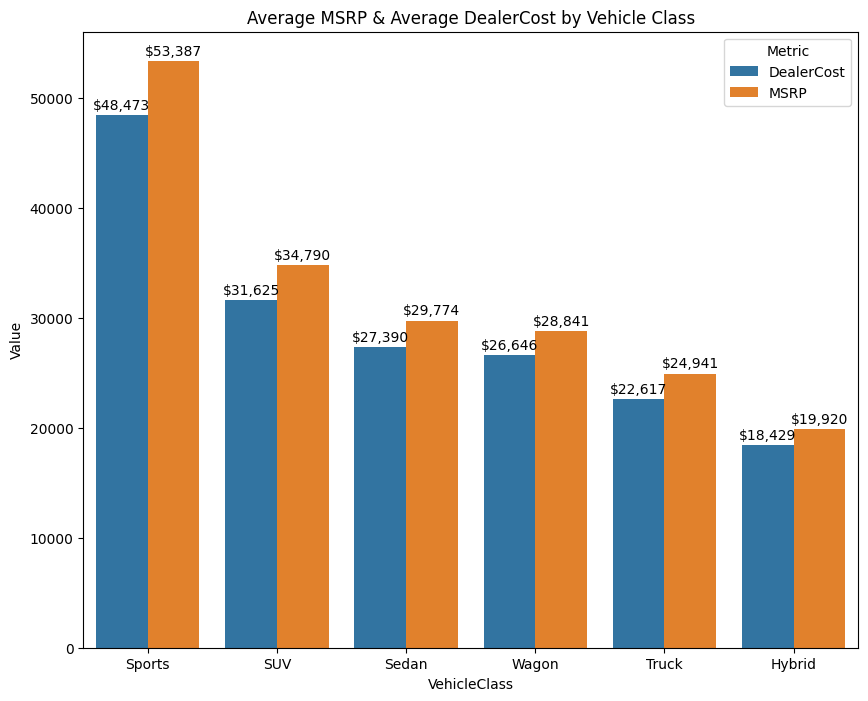

In [122]:
plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=vehicle_class_msrp_dealer,
    x='VehicleClass',
    y='Value',
    hue='Metric'
)

for container in ax.containers:
    labels= [value_to_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 2)

plt.title("Average MSRP & Average DealerCost by Vehicle Class")
plt.show()

Sports class are the most expensive with MSRP: $53,387 & DealerCost: $48,473 while the rest are close to each other decreasingly

In [123]:
#average MSRP, Dealer Cost by Drivetrain

drive_train_msrp_dealer= df.groupby("DriveTrain").agg({'MSRP': 'mean', 'DealerCost': 'mean'}).reset_index().sort_values('MSRP', ascending=False)
drive_train_msrp_dealer= drive_train_msrp_dealer.melt(id_vars='DriveTrain', value_vars={'MSRP', 'DealerCost'}, var_name='Metric', value_name='Value')
print(drive_train_msrp_dealer)

  DriveTrain      Metric         Value
0       Rear  DealerCost  42101.363636
1        All  DealerCost  33202.630435
2      Front  DealerCost  22834.070796
3       Rear        MSRP  46093.627273
4        All        MSRP  36483.489130
5      Front        MSRP  24782.557522


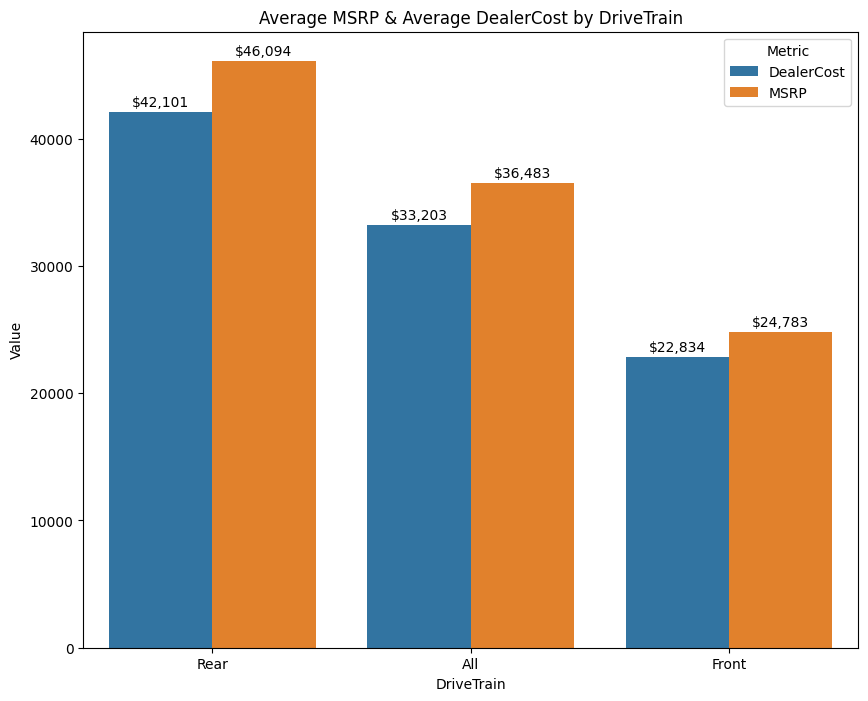

In [124]:
plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=drive_train_msrp_dealer,
    x='DriveTrain',
    y='Value',
    hue='Metric'
)

for container in ax.containers:
    labels= [value_to_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 2)

plt.title("Average MSRP & Average DealerCost by DriveTrain")
plt.show()

Rear DriveTrain are most expensive

In [125]:
#vehicleClass by DriveTrain

class_drivetrain = df.groupby(["DriveTrain", "VehicleClass"]).size().reset_index(name="Count")
print(class_drivetrain)

   DriveTrain VehicleClass  Count
0         All          SUV     38
1         All        Sedan     28
2         All       Sports      5
3         All        Truck     12
4         All        Wagon      9
5       Front       Hybrid      3
6       Front          SUV     22
7       Front        Sedan    179
8       Front       Sports      8
9       Front        Wagon     14
10       Rear        Sedan     55
11       Rear       Sports     36
12       Rear        Truck     12
13       Rear        Wagon      7


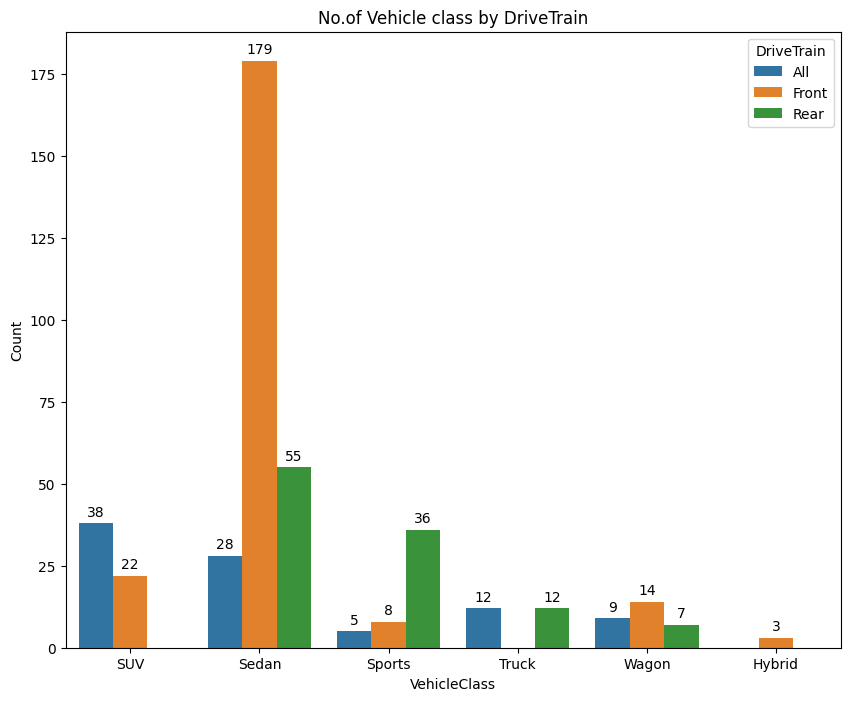

In [127]:
plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=class_drivetrain,
    x='VehicleClass',
    y='Count',
    hue='DriveTrain'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge', padding=3)

plt.title("No.of Vehicle class by DriveTrain")
plt.show()

Rear DriveTrain has the most sports car (which are typically expensive) and 55 sedan cars that explains why Rear DriveTrain are most expensive (like in previous chart)

In [128]:
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197


In [129]:
#average mpg by driveTrain
avg_mpg_drive_train= df.groupby('DriveTrain').agg({'MPG_City': 'mean'}).reset_index()
print(avg_mpg_drive_train)

  DriveTrain   MPG_City
0        All  16.978261
1      Front  22.256637
2       Rear  18.127273


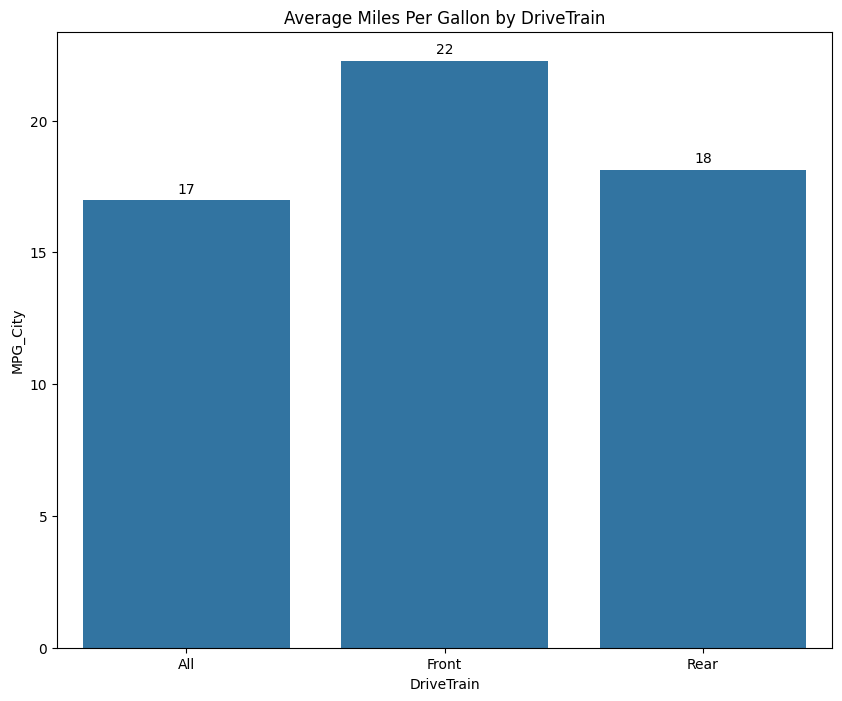

In [133]:
plt.figure(figsize=(10,8))

ax= sns.barplot(
    data=avg_mpg_drive_train,
    x='DriveTrain',
    y='MPG_City'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge', padding=3)


plt.title("Average Miles Per Gallon by DriveTrain")
plt.show()

All wheel drive consumes much more gallons than the rest 

In [135]:
#average horse power by model
average_horse_model= df.groupby('VehicleClass').agg({'HorsePower': 'mean'}).reset_index()
print(average_horse_model)

  VehicleClass  HorsePower
0       Hybrid   92.000000
1          SUV  235.816667
2        Sedan  201.656489
3       Sports  284.163265
4        Truck  224.833333
5        Wagon  194.000000


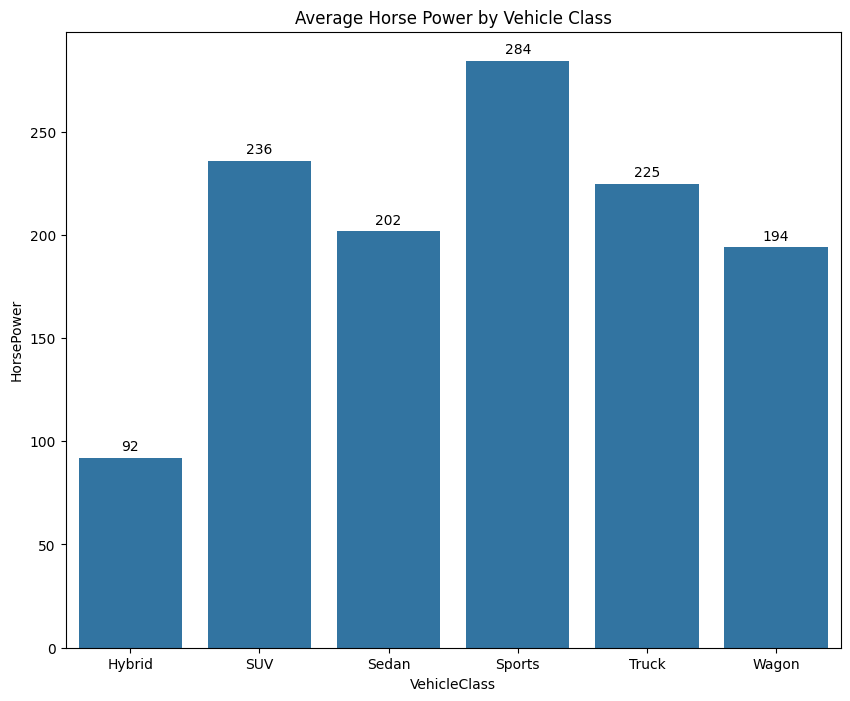

In [137]:
plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=average_horse_model,
    x='VehicleClass',
    y='HorsePower'
)


for container in ax.containers:
    ax.bar_label(container, fmt='%0.f', label_type='edge', padding=3)

plt.title("Average Horse Power by Vehicle Class")
plt.show()

Sport cars have the most powerful engine and SUVs come in next, while hybrid cars are with weakest average of horsepower of 92

In [155]:
#average mpg by driveTrain
avg_mpg_vehicle= df.groupby(['DriveTrain', 'VehicleClass']).agg({'MPG_City': 'mean'}).reset_index()
print(avg_mpg_vehicle)

   DriveTrain VehicleClass   MPG_City
0         All          SUV  15.842105
1         All        Sedan  18.357143
2         All       Sports  19.200000
3         All        Truck  15.083333
4         All        Wagon  18.777778
5       Front       Hybrid  55.000000
6       Front          SUV  16.545455
7       Front        Sedan  22.458101
8       Front       Sports  19.375000
9       Front        Wagon  23.285714
10       Rear        Sedan  18.000000
11       Rear       Sports  18.083333
12       Rear        Truck  17.916667
13       Rear        Wagon  19.714286


In [156]:
avg_mpg_vehicle = avg_mpg_vehicle.pivot(index='VehicleClass', columns='DriveTrain', values='MPG_City')
print(avg_mpg_vehicle)

DriveTrain          All      Front       Rear
VehicleClass                                 
Hybrid              NaN  55.000000        NaN
SUV           15.842105  16.545455        NaN
Sedan         18.357143  22.458101  18.000000
Sports        19.200000  19.375000  18.083333
Truck         15.083333        NaN  17.916667
Wagon         18.777778  23.285714  19.714286


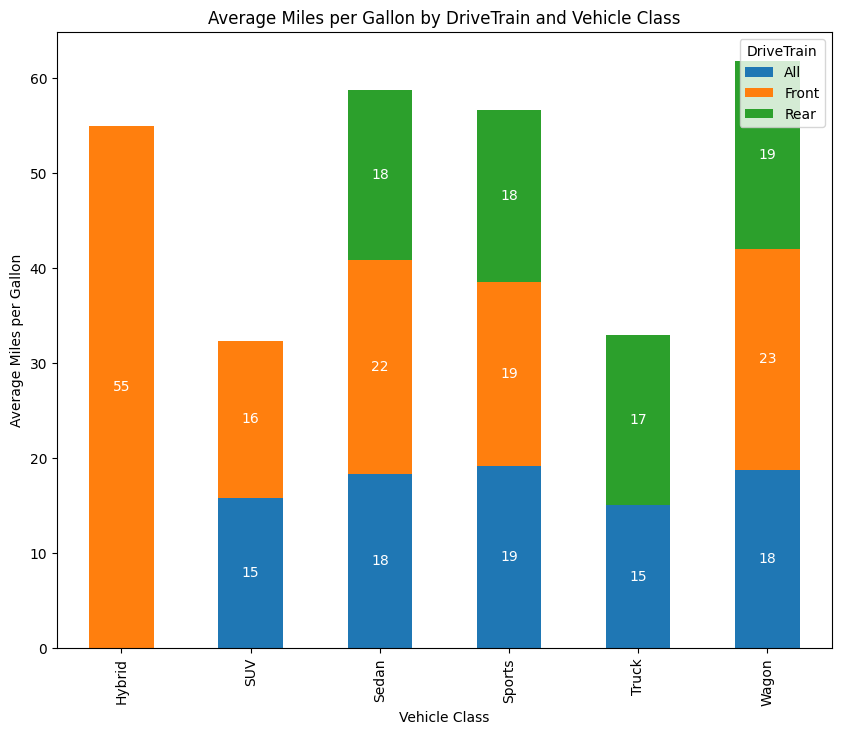

In [157]:
ax = avg_mpg_vehicle.plot(kind='bar', stacked=True, figsize=(10,8))

for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:
            ax.annotate(
                f'{int(bar.get_height())}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center', fontsize= 10, color='white'
            )


plt.title("Average Miles per Gallon by DriveTrain and Vehicle Class")
plt.ylabel('Average Miles per Gallon')
plt.xlabel("Vehicle Class")
plt.show()

- Hybrid Cars are most fuel efficient as they are front wheel drive which is most fuel efficient DriveTrain.</br>
- hybrid cars as well are least horsepower</br>
- SUVs and Trucks are most fuel Inefficient as with All Wheel Drive system are of Average miles per gallon of 15</br>
- even sports cars that are most powerful (high horse power) are much more efficient than SUVs and Trucks as with all wheel Drive system of Average miles per gallon of 19

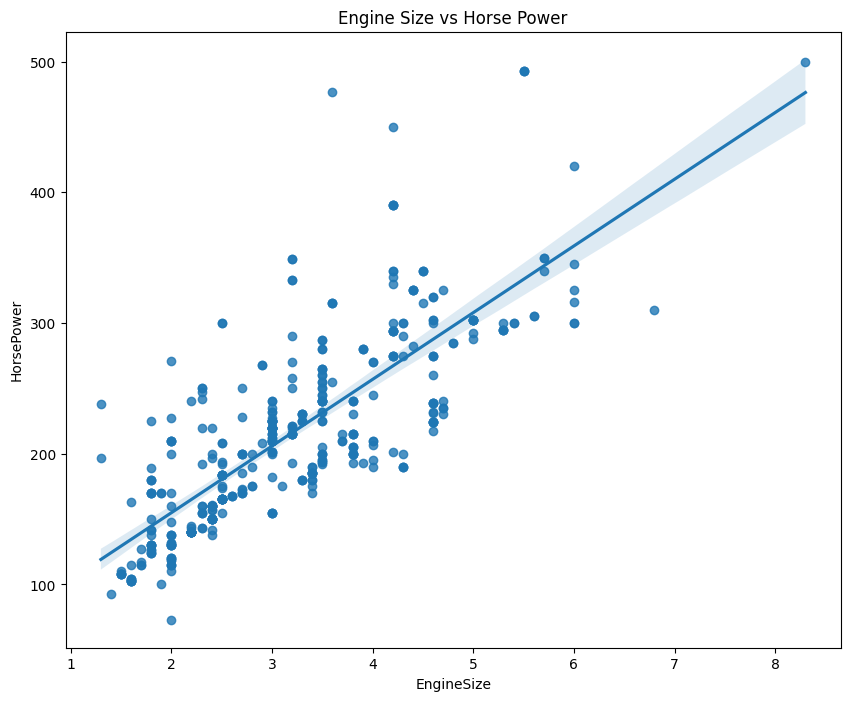

In [ ]:
#investigate more on mpg, enginesize, horse power, msrp, weight

plt.figure(figsize=(10,8))

sns.regplot(
    data= df,
    x='EngineSize',
    y='HorsePower',
    ci=95
    
)

plt.title("Engine Size vs Horse Power")

plt.show()

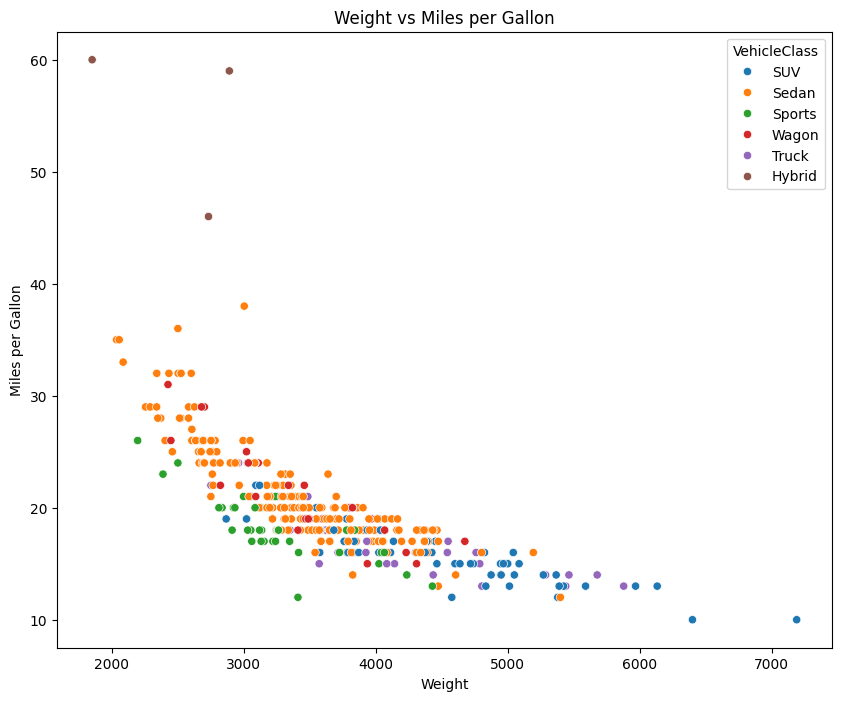

In [182]:
#weight vs MPG

plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x='Weight',
    y='MPG_City',
    hue='VehicleClass'
)

plt.title("Weight vs Miles per Gallon")
plt.ylabel('Miles per Gallon')
plt.show()

- less weight saves more gallons

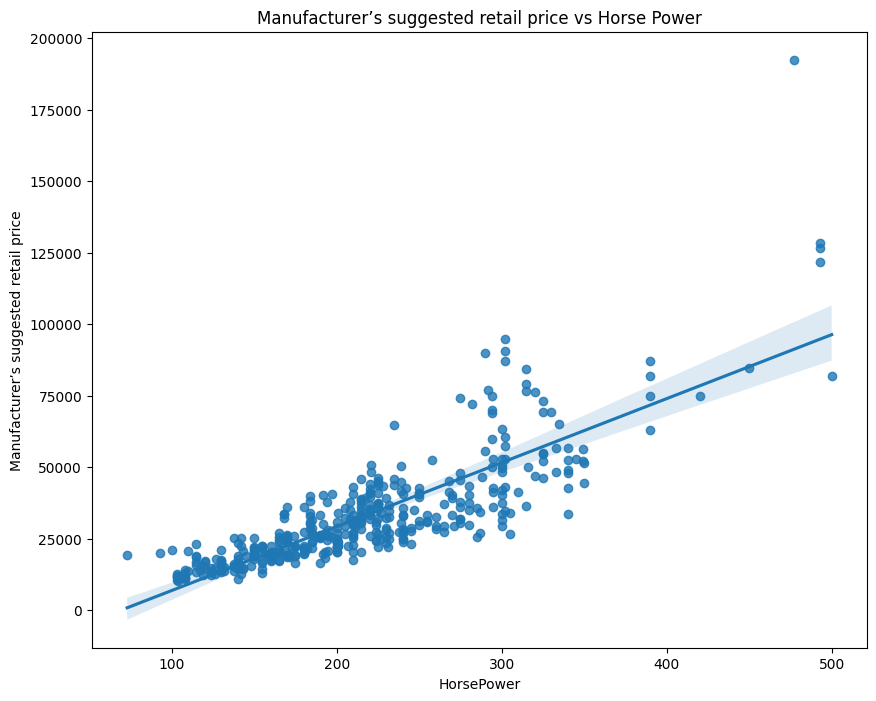

In [183]:
#investigate more on mpg, enginesize, horse power, msrp, weight

plt.figure(figsize=(10,8))

sns.regplot(
    data= df,
    x='HorsePower',
    y='MSRP',
    ci=95
    
)

plt.title("Manufacturer’s suggested retail price vs Horse Power")
plt.ylabel("Manufacturer’s suggested retail price")
plt.show()

There is a strong positive relation between manufacturer’s suggested retail price and Horse Power

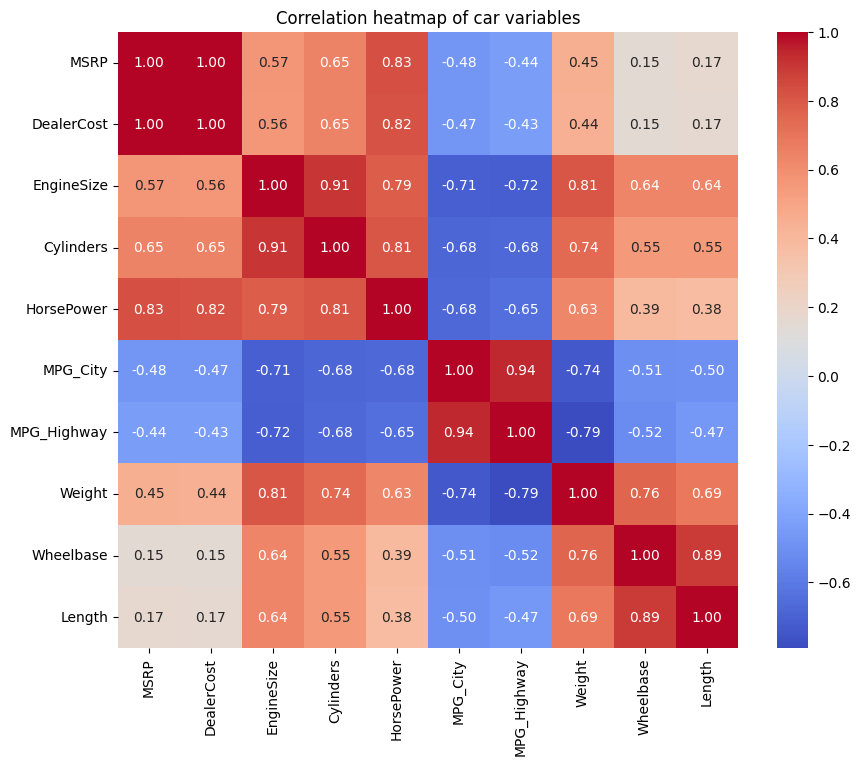

In [185]:
numbers_df = df.select_dtypes(include='number')

corr_df = numbers_df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title("Correlation heatmap of car variables")
plt.show()

- Strong positive correlation between MSRP (manufacturer’s suggested retail price) and Horse power <br>
- Strong positive correlation between cylinders and engine size
- Strong negative correlation between miles per gallon and weight